## Import Libraries

In [1]:
## Import Libraries
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from matplotlib import pyplot
%matplotlib inline

## Load data

In [2]:
## Read "UniversalBank.csv" using pandas
unibank = pd.read_csv("UniversalBank.csv")

In [3]:
## Print the first 7 rows
unibank.head(7)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0


In [4]:
unibank.shape

(5000, 14)

In [5]:
## Check the datatype of each variable
unibank.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [6]:
unibank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Pre-Processing

In [7]:
## Drop columns which are not significant
unibank.drop(["ID","ZIP Code"],axis=1,inplace=True)

In [8]:
## Write code for type casting categorical variables
""
""

''

In [9]:
## Write code to find out Value counts

In [10]:
## Convert Categorical Columns to Dummies
cat_cols = ["Family","Education","Personal Loan","Securities Account","CD Account","Online","CreditCard"]
unibank = pd.get_dummies(unibank,columns=cat_cols,drop_first=True,)

In [11]:
len(unibank.columns)

15

In [12]:
unibank

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Personal Loan_1,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,1,49,1.6,0,0,0,1,0,0,0,1,0,0,0
1,45,19,34,1.5,0,0,1,0,0,0,0,1,0,0,0
2,39,15,11,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.7,0,0,0,0,1,0,0,0,0,0,0
4,35,8,45,1.0,0,0,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1.9,0,0,0,0,0,1,0,0,0,1,0
4996,30,4,15,0.4,85,0,0,1,0,0,0,0,0,1,0
4997,63,39,24,0.3,0,1,0,0,0,1,0,0,0,0,0
4998,65,40,49,0.5,0,0,1,0,1,0,0,0,0,1,0


In [13]:
## Split the data into X and y
X = unibank.copy().drop("Personal Loan_1",axis=1)
y = unibank["Personal Loan_1"]

In [14]:
X.shape

(5000, 14)

In [15]:
y.shape

(5000,)

In [16]:
## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [17]:
## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 14)
(1000, 14)
(4000,)
(1000,)


In [18]:
## Scale the numeric attributes
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,:5])

X_train.iloc[:,:5] = scaler.transform(X_train.iloc[:,:5])
X_test.iloc[:,:5] = scaler.transform(X_test.iloc[:,:5])

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


## Model Building

In [19]:
logreg = LogisticRegression()

In [20]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_train_pred = logreg.predict(X_train)
## Print accuracy_score using y_test and y_pred
print(accuracy_score(y_train,y_train_pred))
## Print Confusion Matrix using y_test and y_pred
print(confusion_matrix(y_train,y_train_pred))

0.959
[[3572   34]
 [ 130  264]]


In [22]:
y_pred=logreg.predict(X_test)

In [23]:

## Print accuracy_score using y_test and y_pred
print(accuracy_score(y_test,y_pred))
## Print Confusion Matrix using y_test and y_pred
print(confusion_matrix(y_test,y_pred))

0.965
[[903  11]
 [ 24  62]]


In [24]:
#True Positive Rate = True Positives / (True Positives + False Negatives)
#The true positive rate is also referred to as sensitivity.
#Sensitivity = True Positives / (True Positives + False Negatives)
#False Positive Rate = False Positives / (False Positives + True Negatives)
#Specificity = True Negatives / (True Negatives + False Positives)
#False Positive Rate = 1 - Specificity

In [25]:
# calculate roc curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred = logreg.predict_proba(X_test)
y_pred = y_pred[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# calculate AUC
ns_probs = [0 for _ in range(len(y_test))]
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.956


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.956


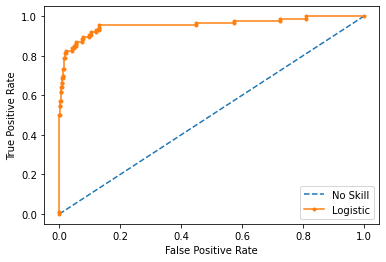

In [26]:
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, y_pred)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Best Threshold=0.162342, G-Mean=0.894


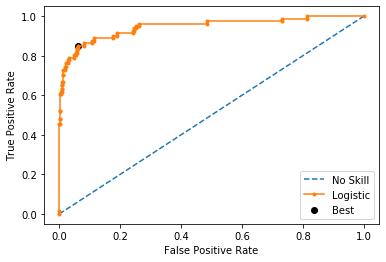

In [25]:
from numpy import sqrt
from numpy import argmax
yhat = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()